### An example of a Continuous-Time System: Mass-Spring-Damper

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# force input signal: an impulse
Fs = 1000
T = 1/Fs
L = 2000
Fext = np.zeros(L)
Fext[1] = 1

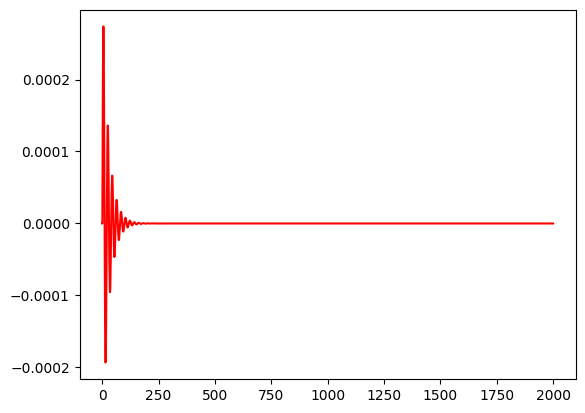

In [14]:
# Run the simulation of the Mass-Spring-Damper system - 
# Symplectic Forward Euler 

D = 0.7
k = 1000
m = 0.01

alpha = m/(T**2)
beta = D/T
b1 = 1/alpha
a1 = - ( k + beta - 2*alpha )/alpha
a2 = - ( alpha - beta )/alpha

x = np.zeros(L)
for n in range(1,L):
    x[n] = b1*Fext[n-1] + a1*x[n-1] + a2*x[n-2]
    
plt.plot(x,'-r')
plt.grid()

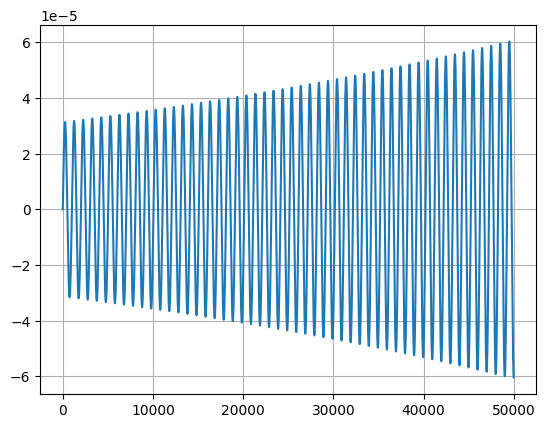

In [17]:
## Forward Euler (unstable) - notice that it will become unstable at low Fs or low D
Fs = 32000
T = 1/Fs
L = 50000
Fext = np.zeros(L)
Fext[1] = 100

D = 0.2
k = 20000
m = 0.5

a1 = 2 - T*D/m
a2 = -1 - T*T/m*k + T*D/m
b1 = T*T/m

x = np.zeros(L)
for n in range(1,L):
    x[n] = b1*Fext[n-1] + a1*x[n-1] + a2*x[n-2]
    
plt.plot(x)
plt.grid()

condition: 
2000.02
<
1936000.0000000005


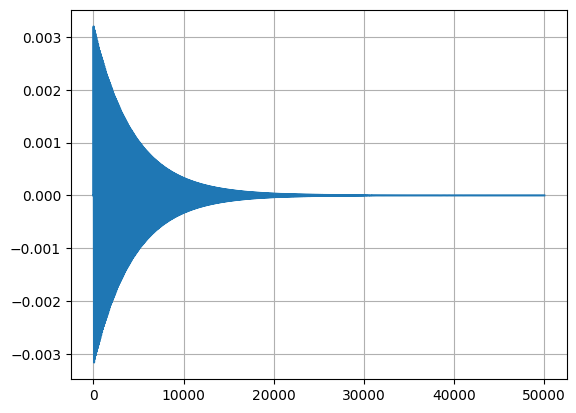

In [30]:
## 2nd Order Central Difference Scheme
# y(n+1) = 2y(n) − y(n−1) +  F(n)/M with M = m/T^2
# this is very stable - see stability condition below
# 

Fs = 22000
T = 1/Fs
L = 50000
x = np.zeros(L)
Fext[1] = 100

D = 0.01
k = 2000
m = 0.001

# check stability conditions:
M = m/T**2
s = ( k + 2*D )
print('condition: ')
print(s)
print('<')
print(4*M)

b1 = T*T/m

x = np.zeros(L)

for n in range(2,L):

    v = (x[n-1] - x[n-2])/T     # v approximated with BE
    
    F = -k*x[n-1] -D*v + Fext[n-1]   # force from prev step
    
    x[n] = b1*F + 2*x[n-1] - x[n-2]   

plt.plot(x)
plt.grid()

(0.0, 500.0)

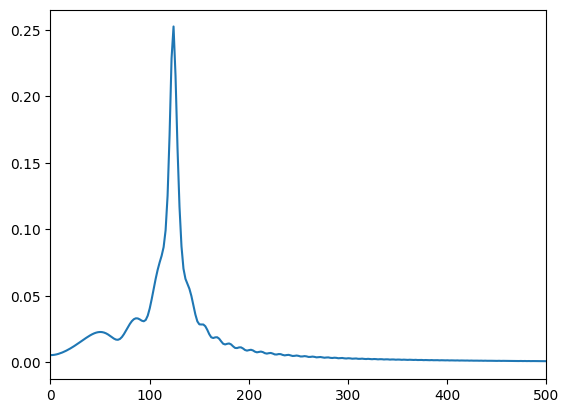

In [35]:
# Let's have a look at the spectrum of the output signal using the DFT
# note the resonant frequency of the system

from numpy.fft import fft

X = abs( fft(x) )
Y = abs( fft(y) )
f = np.linspace(0,Fs/2,L//2)
#plt.plot(f,X[:L//2])
plt.plot(f,Y[:L//2])
plt.xlim(0,500)


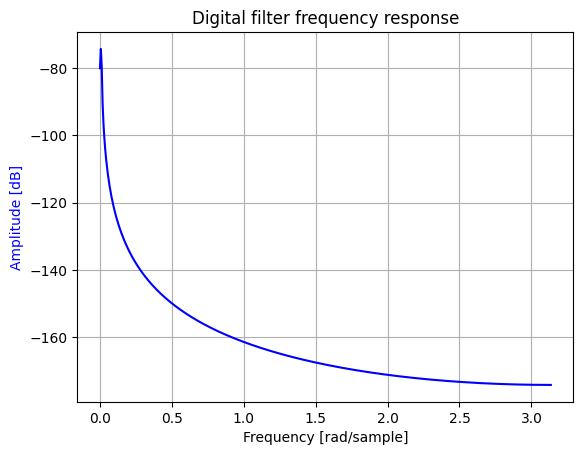

In [104]:
# plot freq response with freqz
import scipy

# the system response h, written 
# as the "a" coefficients and the "b" coefficients
a = [1, -a1, -a2]
b = [0, b1]

#scipy.signal.freqz?
w,h = scipy.signal.freqz(b,a)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid()

(array([0.]), array([0.99997813+0.00624996j, 0.99997813-0.00624996j]), 1.953125e-09)


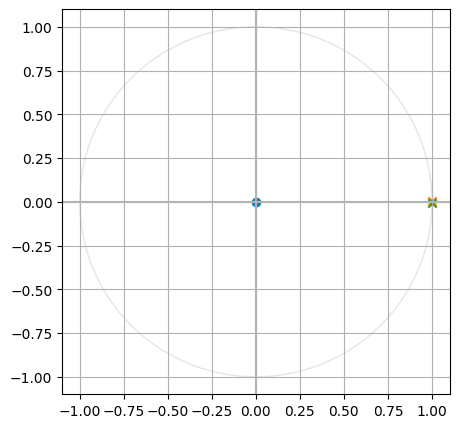

In [110]:
from scipy.signal import freqz,tf2zpk,dimpulse
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
#tf2zpk?

# The b and a arrays are interpreted as coefficients for positive, 
# descending powers of the transfer function variable
# the discrete-time transfer function coefficients must first be 
# converted to the "positive powers" form before finding the poles and zeros.
a = [1, -a1, -a2 ]
b = [ b1, 0 ]

zpk = tf2zpk(b,a)
print(zpk)

zeros = zpk[0]
poles = zpk[1]

fig,ax = plt.subplots(1)
fig.set_size_inches(5, 5)
for z in zeros:
    ax.scatter(np.real(z),np.imag(z),marker='o')
for p in poles:
    ax.scatter(np.real(p),np.imag(p),marker='x')

    # Add unit circle and zero axes    
unit_circle = patches.Circle((0,0), radius=1, fill=False,
                             color='black', ls='solid', alpha=0.1)
ax.add_patch(unit_circle)
axvline(0, color='0.7')
axhline(0, color='0.7')

ax.grid()